<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [4]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

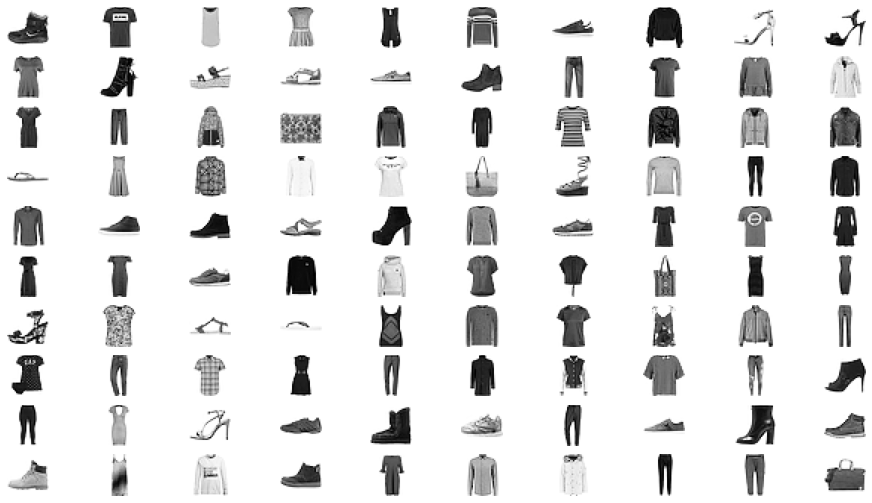

In [5]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

In [ ]:
# Alumno, dibuje la primera imagen y su correspondiente categoria

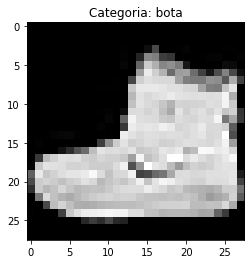

In [6]:
plt.imshow(data_X_train[0], cmap='gray')
plt.title("Categoria: " + category_list[(data_y_train[0])])
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [ ]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)

In [7]:
data_X_train[0][14]

array([  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
       226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
        77,   0], dtype=uint8)

In [ ]:
# Alumno: Normalizar los datos entre 0 y 1

In [9]:
X_train_normalizada = data_X_train / 255
X_test_normalizada  = data_X_test / 255

In [ ]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)

In [10]:
X_train_normalizada.shape[0]

60000

In [ ]:
# Alumno: Imprimir la dimension de la imagen

In [11]:
X_train_normalizada[0].shape


(28, 28)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno: Explorar los primeros diez puloveres del dataset de train

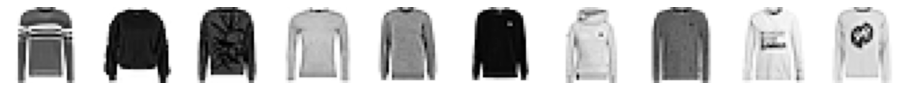

In [12]:
fig = plt.figure(figsize=(16,9))
img = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if data_y_train[img] == 2:
            ax.imshow(X_train_normalizada[img], cmap='Greys')
            img += 1
            break
        img += 1
plt.show()

In [ ]:
# Alumno: Explorar los primeros diez sacos del dataset de train

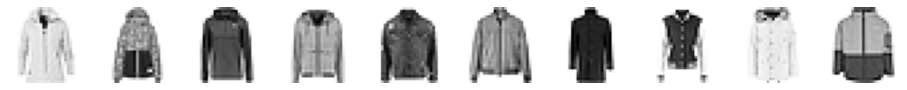

In [13]:
fig = plt.figure(figsize=(16,9))
img = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if data_y_train[img] == 4:
            ax.imshow(X_train_normalizada[img], cmap='Greys')
            img += 1
            break
        img += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [ ]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

In [14]:
num_pixels = X_train_normalizada.shape[1] * X_train_normalizada.shape[2]

X_train = X_train_normalizada.reshape(X_train_normalizada.shape[0], num_pixels).astype('float32')
X_test = X_test_normalizada.reshape(X_test_normalizada.shape[0], num_pixels).astype('float32')

In [ ]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?

In [15]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [16]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [ ]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test

In [17]:
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [19]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [ ]:
# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion

In [126]:
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_185 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_186 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 15s 4ms/step - loss: 0.8974 - accuracy: 0.6937 - val_loss: 0.4571 - val_accuracy: 0.8428
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.8444 - val_loss: 0.4182 - val_accuracy: 0.8503
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8646 - val_loss: 0.3884 - val_accuracy: 0.8630
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8728 - val_loss: 0.3759 - val_accuracy: 0.8612
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8816 - val_loss: 0.3719 - val_accuracy: 0.8642
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.8839 - val_loss: 0.3373 - val_accuracy: 0.8809
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2979 - accuracy: 0.8896 - val_loss: 0.3345 - val_accuracy: 0.8795
Epoch

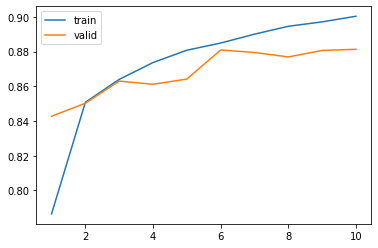

In [22]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [ ]:
# Alumno: Tome el modelo anterior y agregue regularización

# Seleccione el dropout_ratev que mejor le funcione


In [127]:
from keras.layers import Dense, Dropout

model = model
dropout_rate = 0.2
model.add(Dense(units=64, activation='relu', input_shape=(in_shape,)))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_185 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_186 (Dense)            (None, 10)                650       
_________________________________________________________________
dense_187 (Dense)            (None, 64)                704       
_________________________________________________________________
dropout_74 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_188 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_75 (Dropout)         (None, 32)              

In [128]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=100, batch_size=128)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 1.9285 - accuracy: 0.2416 - val_loss: 1.1904 - val_accuracy: 0.4641
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 1.3147 - accuracy: 0.4327 - val_loss: 0.9284 - val_accuracy: 0.6268
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 1.1128 - accuracy: 0.5218 - val_loss: 0.8761 - val_accuracy: 0.6115
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9733 - accuracy: 0.5869 - val_loss: 0.7475 - val_accuracy: 0.7047
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8874 - accuracy: 0.6360 - val_loss: 0.7099 - val_accuracy: 0.6702
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8253 - accuracy: 0.6425 - val_loss: 0.6729 - val_accuracy: 0.7118
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.7854 - accuracy: 0.6738 - val_loss: 0.6427 - val_accuracy: 0.7573

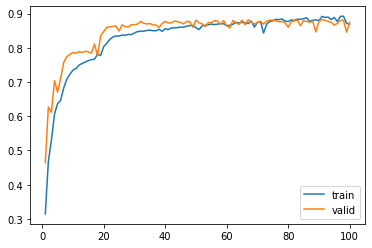

In [129]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [ ]:
# Alumno: Predecir las probabilidades del dataset X_test

In [130]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.9140135e-28,
        0.0000000e+00, 1.0000000e+00],
       [7.3682205e-03, 1.9168294e-04, 8.5472041e-01, 2.2624757e-03,
        3.5879482e-02, 3.8354742e-04, 8.3751015e-02, 2.7612926e-04,
        1.4941058e-02, 2.2601671e-04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# Alumno: Transformar las probabilidades en y_hat usando argmax

In [132]:
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [ ]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)

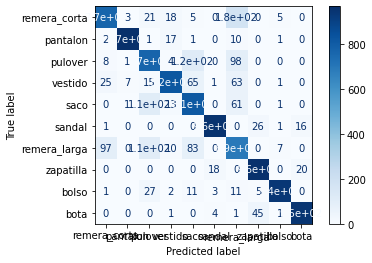

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=category_list)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [135]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [ ]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco

In [147]:
X_test_peores = X_test[rank_saco]
y_test_peores = y_test[rank_saco]

In [ ]:
# Alumno: Calcular la exactitud de los sacos seleccionados

In [148]:
scores = model.evaluate(X_test_peores, y_test_peores)
scores[1]

1/1 [==============================] - 0s 23ms/step - loss: 1.7545 - accuracy: 0.4000


0.4000000059604645

In [ ]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

In [150]:
y_hat_prob_peores = model.predict(X_test_peores)
y_hat_peores = np.argmax(y_hat_prob_peores,axis=1)
y_hat_peores

array([4, 4, 2, 6, 4, 2, 4, 2, 2, 2])

In [159]:
for i in y_hat_peores:
  print(category_list[i])

saco
saco
pulover
remera_larga
saco
pulover
saco
pulover
pulover
pulover


In [ ]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

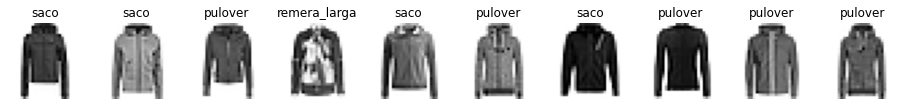

In [158]:
fig = plt.figure(figsize=(16,9))
n = 0

for i in rank_saco:
    ax = fig.add_subplot(1, 10, n + 1)
    ax.axis('off')
    ax.imshow(X_test_normalizada[i], cmap='Greys')
    ax.set_title(category_list[y_hat_peores[n]])
    n += 1

plt.show()




# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)